# World Suicide Statistics 


### Some Basic Data Visualization

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [128]:
df = pd.read_csv("suicide homicide gdp.csv")
df.head()

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income


#### Check data integrity, cleaned up the NANs for some averages.

In [130]:
df_cleaned = df.dropna(subset=["Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)"])
df_cleaned.head(3)

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
39,Afghanistan,AFG,AF,2009,3.926774,4.4,1.241616e+10,1519.692923,South Asia,Low income
40,Afghanistan,AFG,AF,2010,3.368110,4.3,1.585668e+10,1710.575411,South Asia,Low income
41,Afghanistan,AFG,AF,2011,4.087337,4.1,1.780511e+10,1699.488110,South Asia,Low income


In [131]:
print(df.shape)
print(df_cleaned.shape)

(13566, 10)
(2508, 10)


In [132]:
df_cleaned["incomeLevel"].unique()

array(['Low income', 'Aggregates', 'Upper middle income',
       'Lower middle income', 'High income', nan, 'Not classified'],
      dtype=object)

In [133]:
mean_df = pd.DataFrame(df_cleaned.groupby(['country', 'iso3c'])['Suicide mortality rate (per 100,000 population)'].mean().reset_index())
mean_df
 

,country,iso3c,"Suicide mortality rate (per 100,000 population)"
0,Afghanistan,AFG,4.125000
1,Africa Eastern and Southern,AFE,8.635075
2,Africa Western and Central,AFW,6.022582
3,Albania,ALB,5.957895
4,Algeria,DZA,3.315385
...,...,...,...
203,Vietnam,VNM,6.545455
204,World,WLD,9.819199
205,"Yemen, Rep.",YEM,5.841667
206,Zambia,ZMB,9.933333


In [134]:
fig = px.choropleth(mean_df, locations="iso3c",
                    color="Suicide mortality rate (per 100,000 population)", 
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.YlOrRd)
fig.update_layout(title = "Average Suicide Rate")

fig.show()

In [84]:
mean_df_hom = df_cleaned.groupby(["country","iso3c"])["Intentional homicides (per 100,000 people)"].mean().reset_index()
mean_df_hom


,country,iso3c,"Intentional homicides (per 100,000 people)"
0,Afghanistan,AFG,5.912825
1,Africa Eastern and Southern,AFE,11.966667
2,Africa Western and Central,AFW,9.833333
3,Albania,ALB,4.067445
4,Algeria,DZA,1.109717
...,...,...,...
203,Vietnam,VNM,1.337206
204,World,WLD,5.600000
205,"Yemen, Rep.",YEM,4.693661
206,Zambia,ZMB,5.998878


In [135]:
fig = px.choropleth(mean_df_hom, locations="iso3c",
                    color="Intentional homicides (per 100,000 people)",
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.YlOrBr)
fig.update_layout(title = "Average Intentional Homicides")
fig.show()

In [136]:
fig = px.choropleth(df.sort_values("year"), 
                    locations = "country", 
                    color = "GDP (current US$)",
                    locationmode = "country names",
                    animation_frame = "year",
                    color_continuous_scale=px.colors.sequential.YlOrBr)
fig.update_layout(title = "GDP (current US$)")
fig.show()

### Top 10 Homicide

In [137]:
df_mean_country =  df.groupby(["country","iso3c","incomeLevel"])["Intentional homicides (per 100,000 people)"].mean().reset_index()
top_ten_hom = df_mean_country.sort_values("Intentional homicides (per 100,000 people)", ascending=False).head(10)
top_ten_hom

,country,iso3c,incomeLevel,"Intentional homicides (per 100,000 people)"
68,El Salvador,SLV,Lower middle income,74.178298
47,Colombia,COL,Upper middle income,50.995671
102,Honduras,HND,Lower middle income,47.886130
218,South Africa,ZAF,Upper middle income,42.120833
119,Jamaica,JAM,Upper middle income,40.821295
137,Lesotho,LSO,Lower middle income,36.920896
256,"Venezuela, RB",VEN,Not classified,36.431583
258,Virgin Islands (U.S.),VIR,High income,35.765492
177,Nigeria,NGA,Lower middle income,34.524046
95,Guatemala,GTM,Upper middle income,33.251046


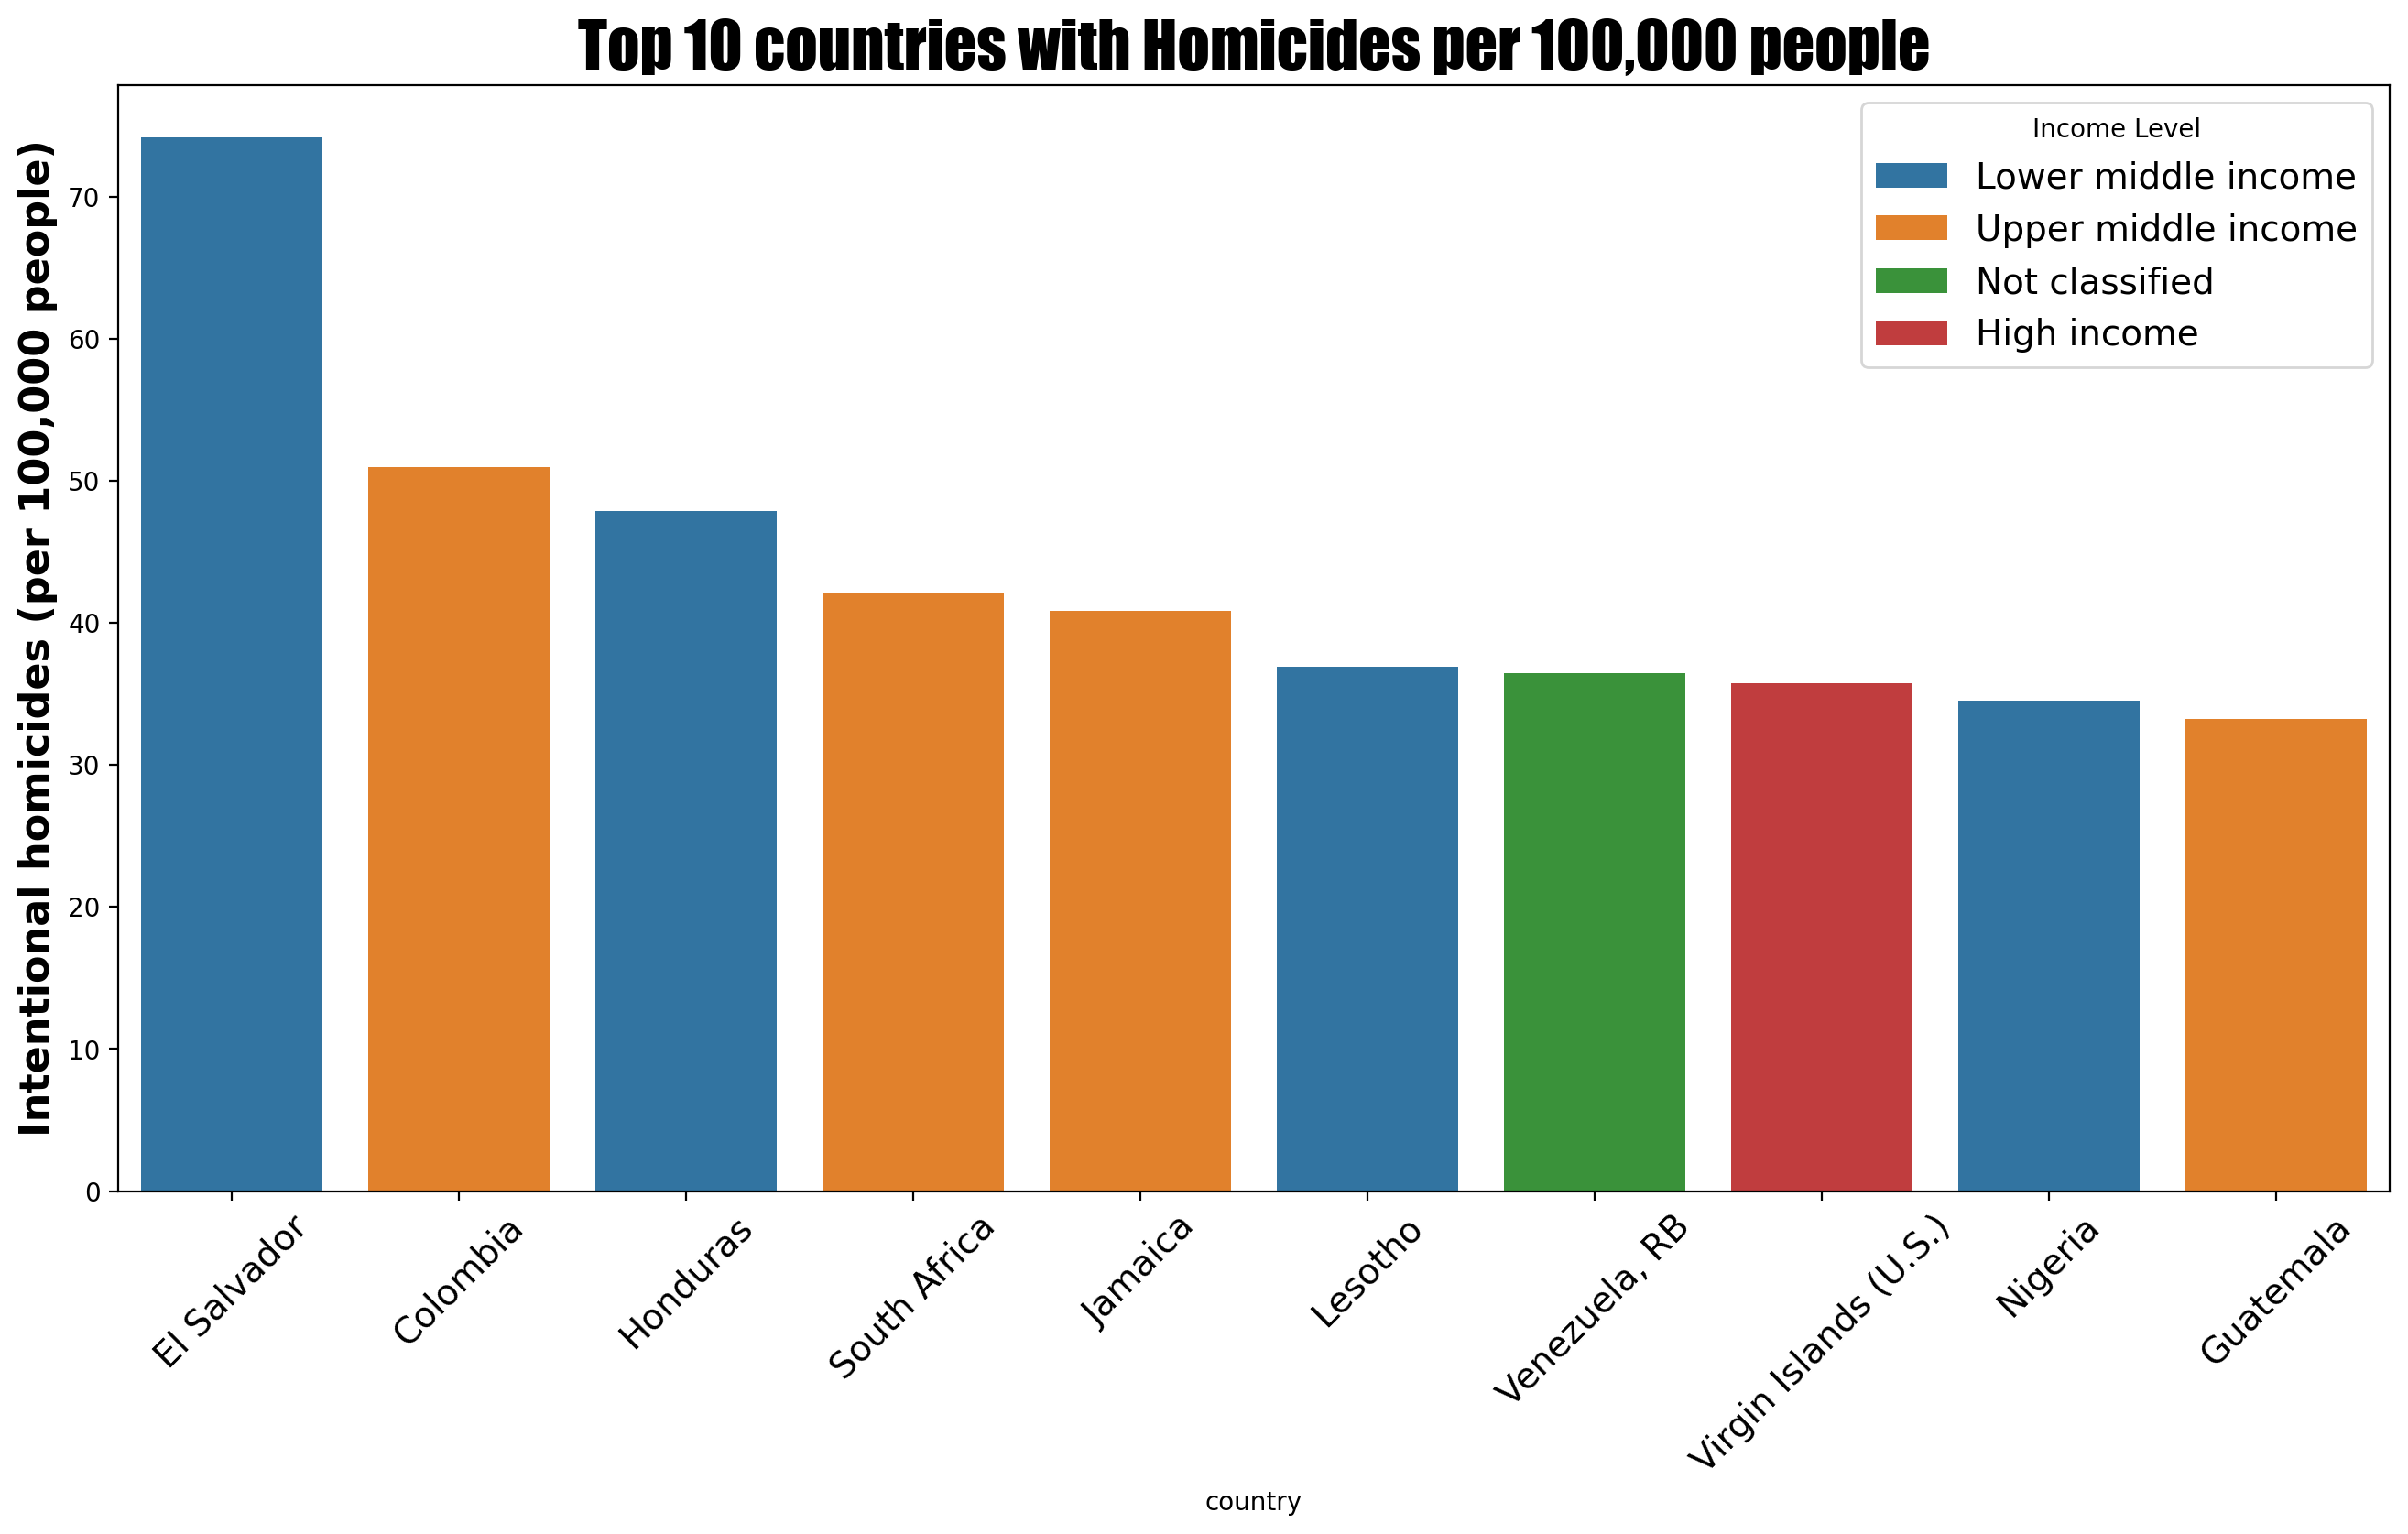

In [138]:

plt.figure(figsize=(16,8), dpi=200)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel("Suicide mortality rate", fontsize=16, weight = "bold")
plt.title("Top 10 countries with Homicides per 100,000 people", fontname="Impact", fontsize=25)
sns.barplot(data = top_ten_hom, y= "Intentional homicides (per 100,000 people)", x = "country", hue="incomeLevel", 
            dodge=False)
plt.legend(fontsize=14, title="Income Level")

## Top 10 Suicide

In [139]:
df_mean_country =  df.groupby(["country","iso3c", "incomeLevel"])["Suicide mortality rate (per 100,000 population)"].mean().reset_index()
top_ten_sui = df_mean_country.sort_values("Suicide mortality rate (per 100,000 population)", ascending=False).head(10)
top_ten_sui

,country,iso3c,incomeLevel,"Suicide mortality rate (per 100,000 population)"
137,Lesotho,LSO,Lower middle income,59.570
72,Eswatini,SWZ,Lower middle income,41.000
201,Russian Federation,RUS,Upper middle income,39.720
141,Lithuania,LTU,High income,37.980
98,Guyana,GUY,Upper middle income,34.575
20,Belarus,BLR,Upper middle income,34.040
122,Kazakhstan,KAZ,Upper middle income,30.695
124,Kiribati,KIR,Lower middle income,30.085
248,Ukraine,UKR,Lower middle income,27.905
126,"Korea, Rep.",KOR,High income,26.750


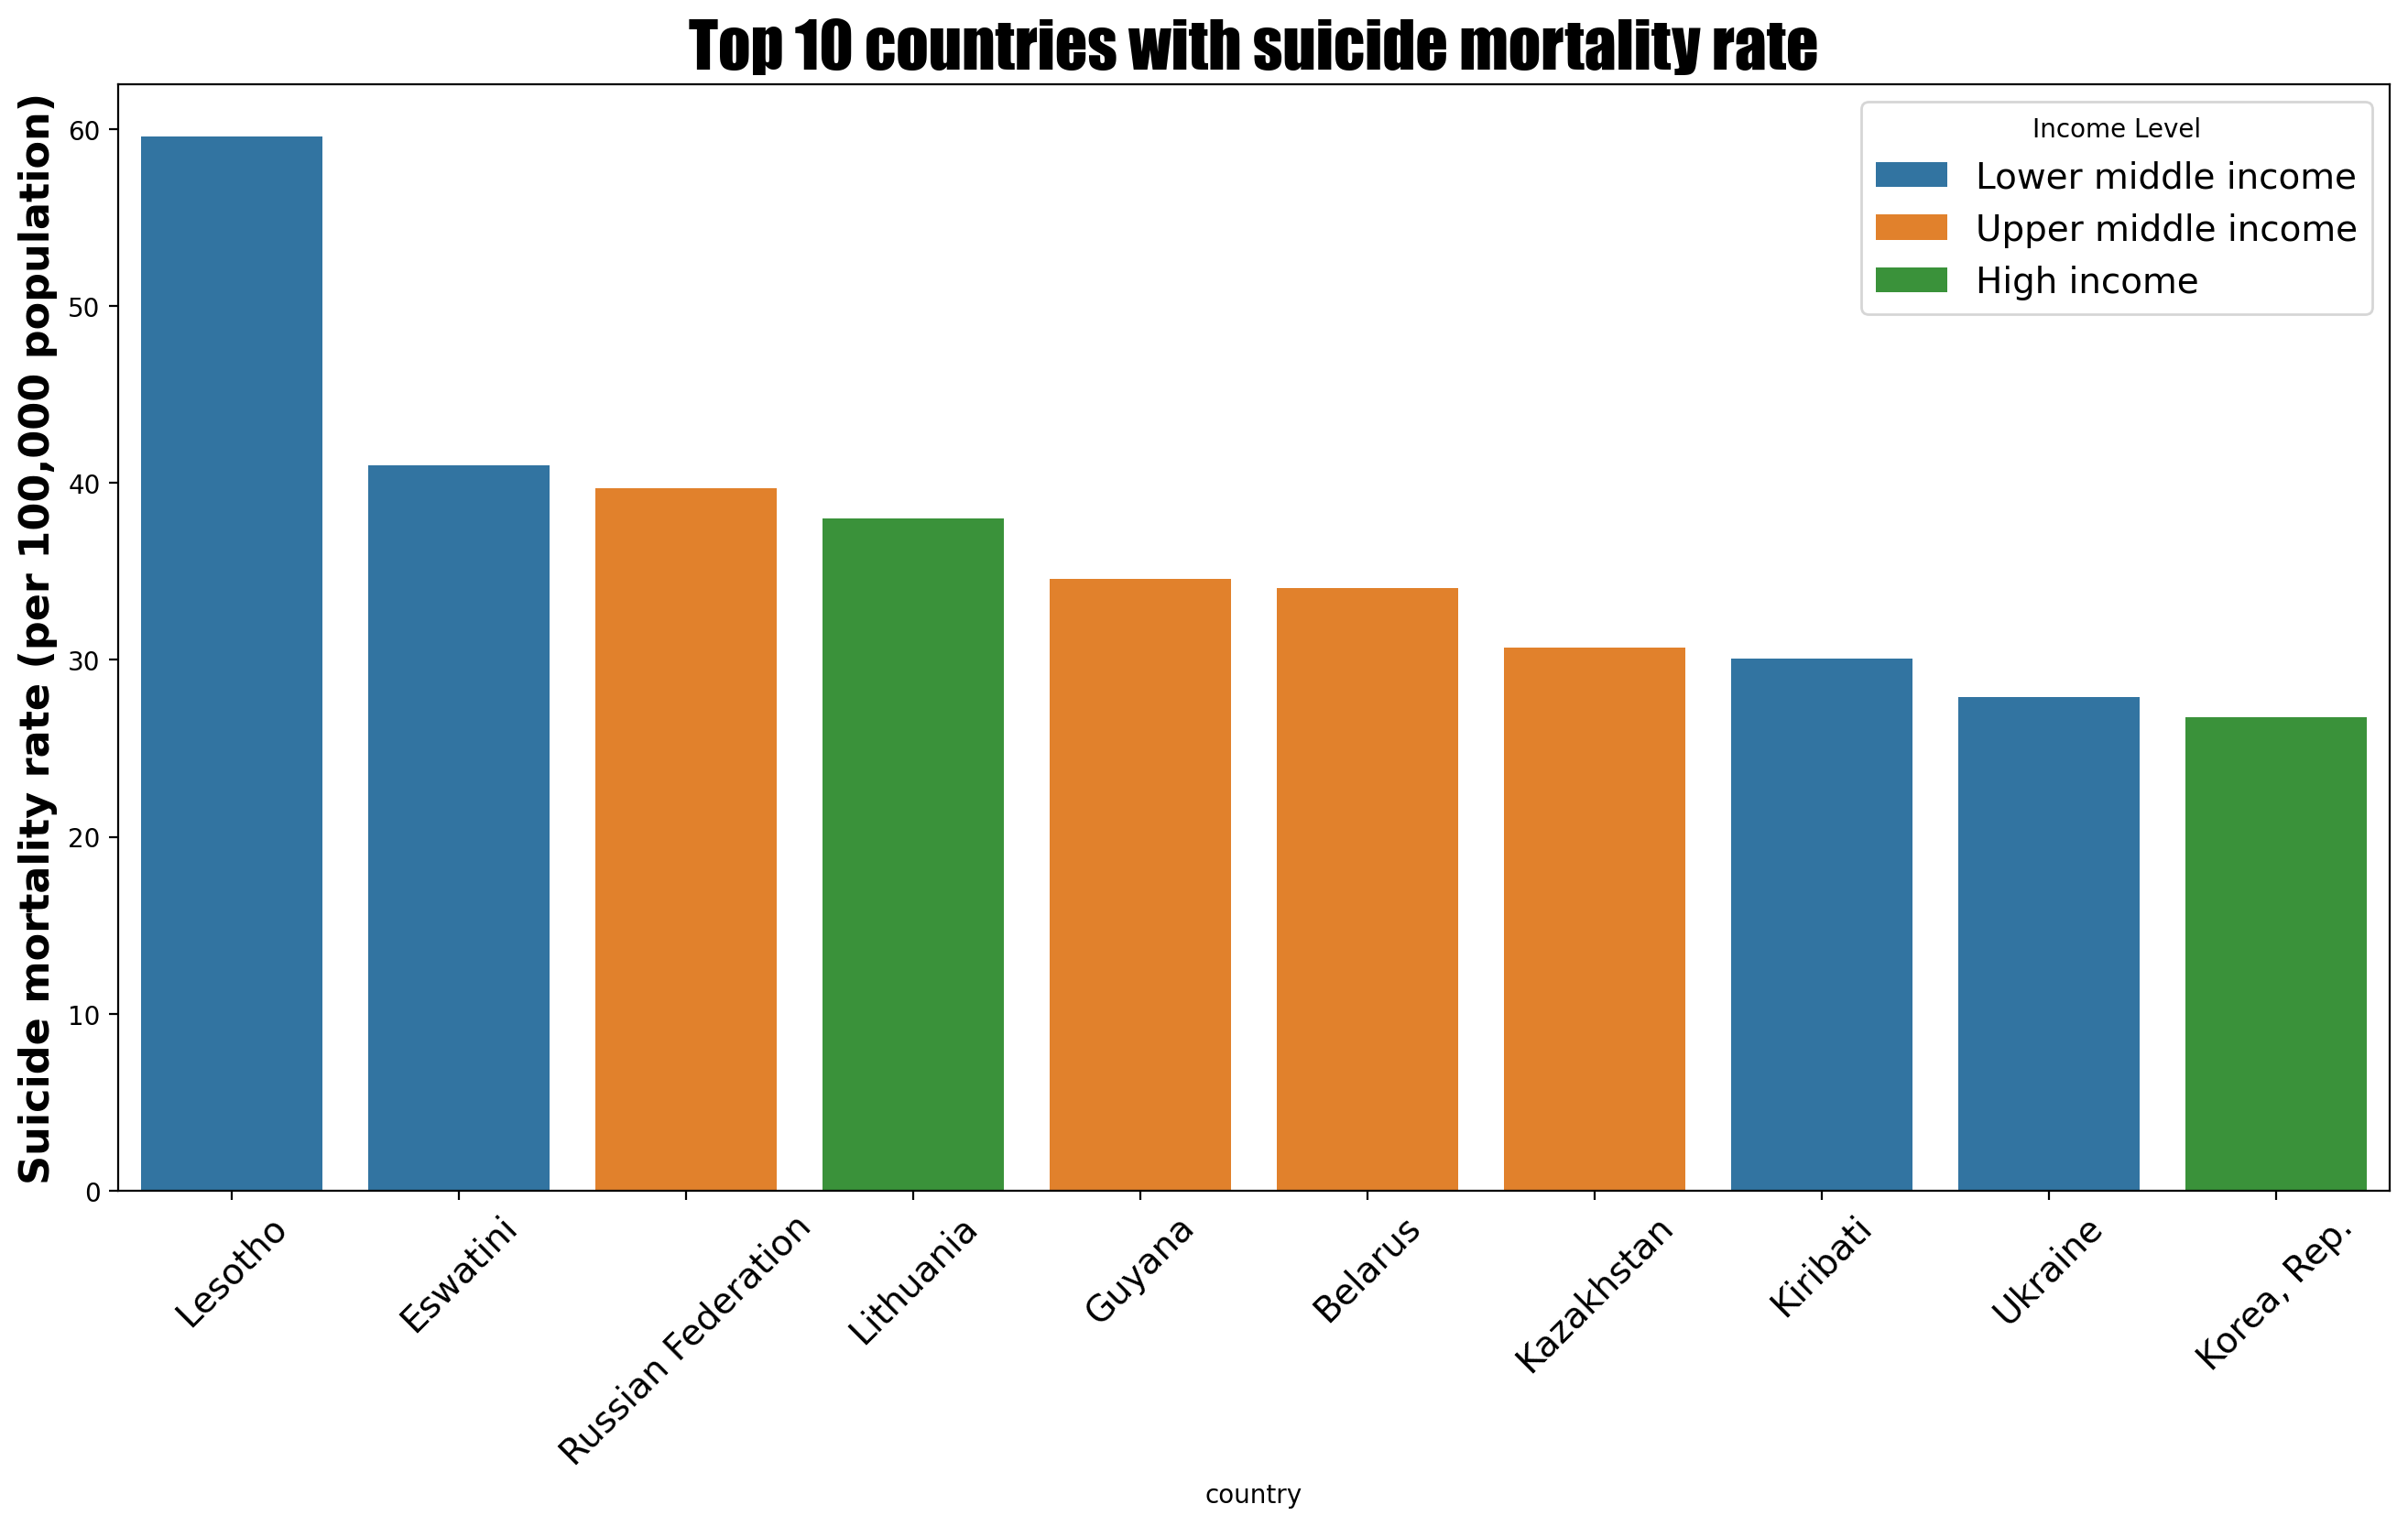

In [140]:
plt.figure(figsize=(16,8), dpi=200)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel("Suicide mortality rate", fontsize=16, weight = "bold")
plt.title("Top 10 countries with suicide mortality rate", fontname="Impact", fontsize=25)
sns.barplot(data =top_ten_sui, y = "Suicide mortality rate (per 100,000 population)", 
            x ="country", hue="incomeLevel", dodge=False, palette="tab10")
plt.legend(fontsize=14, title="Income Level")